In [1]:
## Explore dataset by regions and create visualizations that help see the correlation between U.S. regions and salary.

In [2]:
# Import dependancies.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statistics
from pathlib import Path

# Add Matplotlib inline magic command.
%matplotlib inline

In [3]:
pd.read_csv('salaries_by_region.csv') 
region_df = pd.read_csv('salaries_by_region.csv')
region_df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,"$38,000.00","$70,300.00","$35,100.00","$51,200.00","$100,000.00","$179,000.00"
316,Niagara University,Northeastern,"$36,900.00","$69,700.00","$44,000.00","$57,000.00","$92,000.00","$128,000.00"
317,State University of New York (SUNY) at Fredonia,Northeastern,"$37,800.00","$66,200.00","$32,800.00","$44,200.00","$93,300.00","$181,000.00"
318,University of Southern Maine,Northeastern,"$39,400.00","$63,600.00","$40,400.00","$47,900.00","$85,700.00","$117,000.00"


In [4]:
del region_df['School Name']
del region_df['Mid-Career Median Salary']
del region_df['Mid-Career 10th Percentile Salary']
del region_df['Mid-Career 25th Percentile Salary']
del region_df['Mid-Career 75th Percentile Salary']
del region_df['Mid-Career 90th Percentile Salary']

In [5]:
# Find the totals for each region.
region_df['Region'].value_counts()

Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64

In [6]:
# Get the sum of all data for Region.
total_region = region_df["Region"].count()
total_region

320

In [7]:
# Get Northeastern region percentage from total regional data.
northeastern_percent = 100 * 100 / 320
northeastern_percent

31.25

In [8]:
# Get Southern region percentage from total regional data.
southern_percent = 100 * 79 / 320
southern_percent

24.6875

In [9]:
# Get Midwestern region percentage from total regional data.
midwestern_percent = 100 * 71 / 320
midwestern_percent

22.1875

In [10]:
# Get Western region percentage from total regional data.
western_percent = 100 * 42 / 320
western_percent

13.125

In [11]:
# Get California region percentage from total regional data.
california_percent = 100 * 28 / 320
california_percent

8.75

In [12]:
# Assign one value for all the percentages.
all_percentages = northeastern_percent, southern_percent, midwestern_percent, western_percent, california_percent

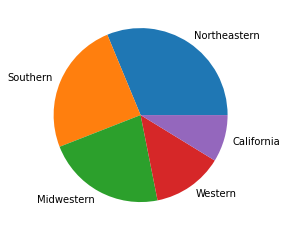

In [13]:
# Create initial pie chart for regional percentages.
plt.pie(all_percentages, labels=["Northeastern", "Southern", "Midwestern", "Western", "California"])
plt.show()

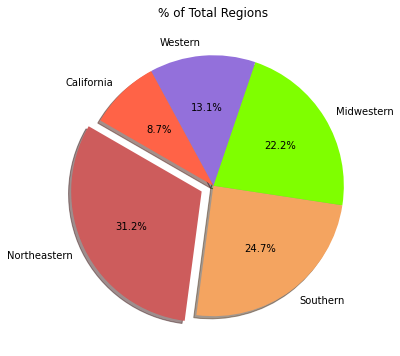

In [14]:
# Create pie chart for regional data.
plt.subplots(figsize=(10, 6))
plt.pie(all_percentages,
    labels=["Northeastern", "Southern", "Midwestern", "Western", "California"],
    colors=["indianred", "sandybrown", "chartreuse", "mediumpurple", "tomato"],
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Regions")
# Save Figure
plt.savefig("regional_analysis_graphs/regionalpiecount.png")
# Show Figure
plt.show()

In [15]:
# Create index for columns.
region_data = region_df.set_index(["Region"])["Starting Median Salary"]
region_data

Region
California      $70,400.00
California      $75,500.00
California      $71,800.00
California      $59,900.00
California      $51,900.00
                   ...    
Northeastern    $38,000.00
Northeastern    $36,900.00
Northeastern    $37,800.00
Northeastern    $39,400.00
Northeastern    $43,700.00
Name: Starting Median Salary, Length: 320, dtype: object

In [16]:
# Make new dataframe with region as index.
region_df = pd.DataFrame(region_data)
region_df

,Starting Median Salary
Region,
California,"$70,400.00"
California,"$75,500.00"
California,"$71,800.00"
California,"$59,900.00"
California,"$51,900.00"
...,...
Northeastern,"$38,000.00"
Northeastern,"$36,900.00"
Northeastern,"$37,800.00"


In [17]:
# Reformat column to numeric.
region_df['Starting Median Salary'] = region_df['Starting Median Salary'].str.replace(',', '')
region_df['Starting Median Salary'] = region_df['Starting Median Salary'].str.replace('$', '')
region_df['Starting Median Salary']

Region
California      70400.00
California      75500.00
California      71800.00
California      59900.00
California      51900.00
                  ...   
Northeastern    38000.00
Northeastern    36900.00
Northeastern    37800.00
Northeastern    39400.00
Northeastern    43700.00
Name: Starting Median Salary, Length: 320, dtype: object

In [18]:
# Reformat column from object to float.
region_df["Starting Median Salary"] = region_df.astype(float)

In [19]:
region_df.head()

,Starting Median Salary
Region,
California,70400.0
California,75500.0
California,71800.0
California,59900.0
California,51900.0


In [20]:
# Use loc method to locate all of the different regions.
region_df = region_df.reset_index()
region_df.loc[:,"Region"].head

<bound method NDFrame.head of 0        California
1        California
2        California
3        California
4        California
           ...     
315    Northeastern
316    Northeastern
317    Northeastern
318    Northeastern
319    Northeastern
Name: Region, Length: 320, dtype: object>

In [21]:
region_df.loc[:,"Region"].head

<bound method NDFrame.head of 0        California
1        California
2        California
3        California
4        California
           ...     
315    Northeastern
316    Northeastern
317    Northeastern
318    Northeastern
319    Northeastern
Name: Region, Length: 320, dtype: object>

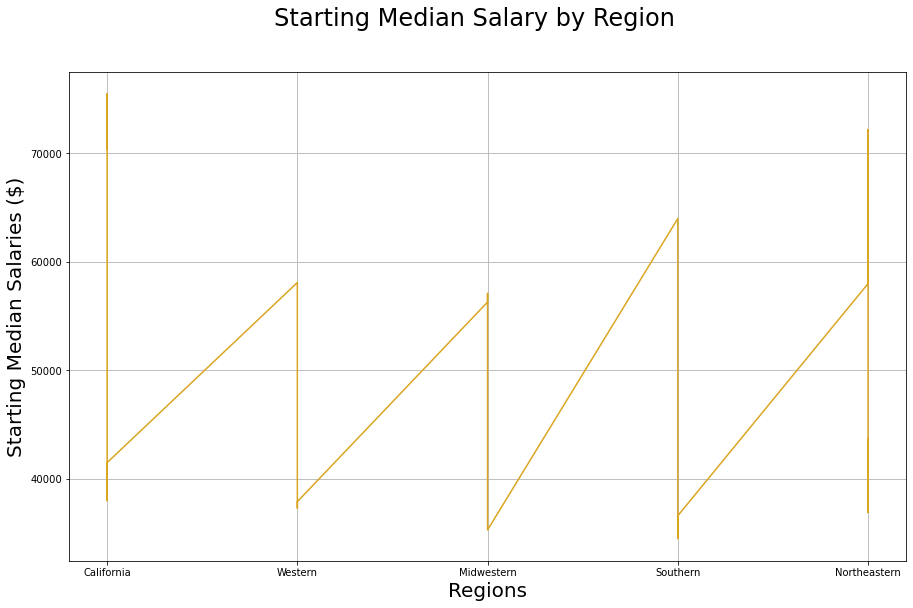

In [32]:
# Create Line Chart.
plt.figure(figsize=(15, 9))
plt.plot(region_df.loc[:,"Region"], region_df.loc[:,"Starting Median Salary"], label="Salary by Regions", color="goldenrod")

plt.suptitle('Starting Median Salary by Region', fontsize=24)
plt.xlabel('Regions', fontsize=20)
plt.ylabel('Starting Median Salaries ($)', fontsize=20)
plt.grid()
# Save Figure
plt.savefig("regional_analysis_graphs/StartingSalariesbyRegions.png")